In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import pi

导入实验数据

In [2]:
C = np.array([0,2,4,6,8,10,10.5,11,12,12.5,13,13.5,14,14.5,15,16,18,20])
cosphi = np.array([0.22,0.26,0.32,0.4,0.52,0.66,0.71,0.75,0.78,0.8,0.8,0.8,
0.74,0.71,0.67,0.54,0.41,0.33])

对数据进行插值拟合，得到函数 f.

In [3]:
f = interp1d(C, cosphi, kind = 'cubic')

导入实验元件参数，计算理论值曲线。

In [4]:
R = 65
L = 0.79
omega = 100*pi
f_ideal = lambda C: R/(R**2+(omega*L-omega*(R**2+omega**2*L**2)*(C*1e-6))**2)**(1/2)

增大取点数，计算对应函数下的功率因数值。

In [5]:
C_new = np.linspace(C.min(),C.max(),300)
cosphi_new = list(map(f,C_new))
cosphi_ideal = list(map(f_ideal,C_new))

调用 matplotlib.pyplot 库，绘制实际曲线和理论曲线。

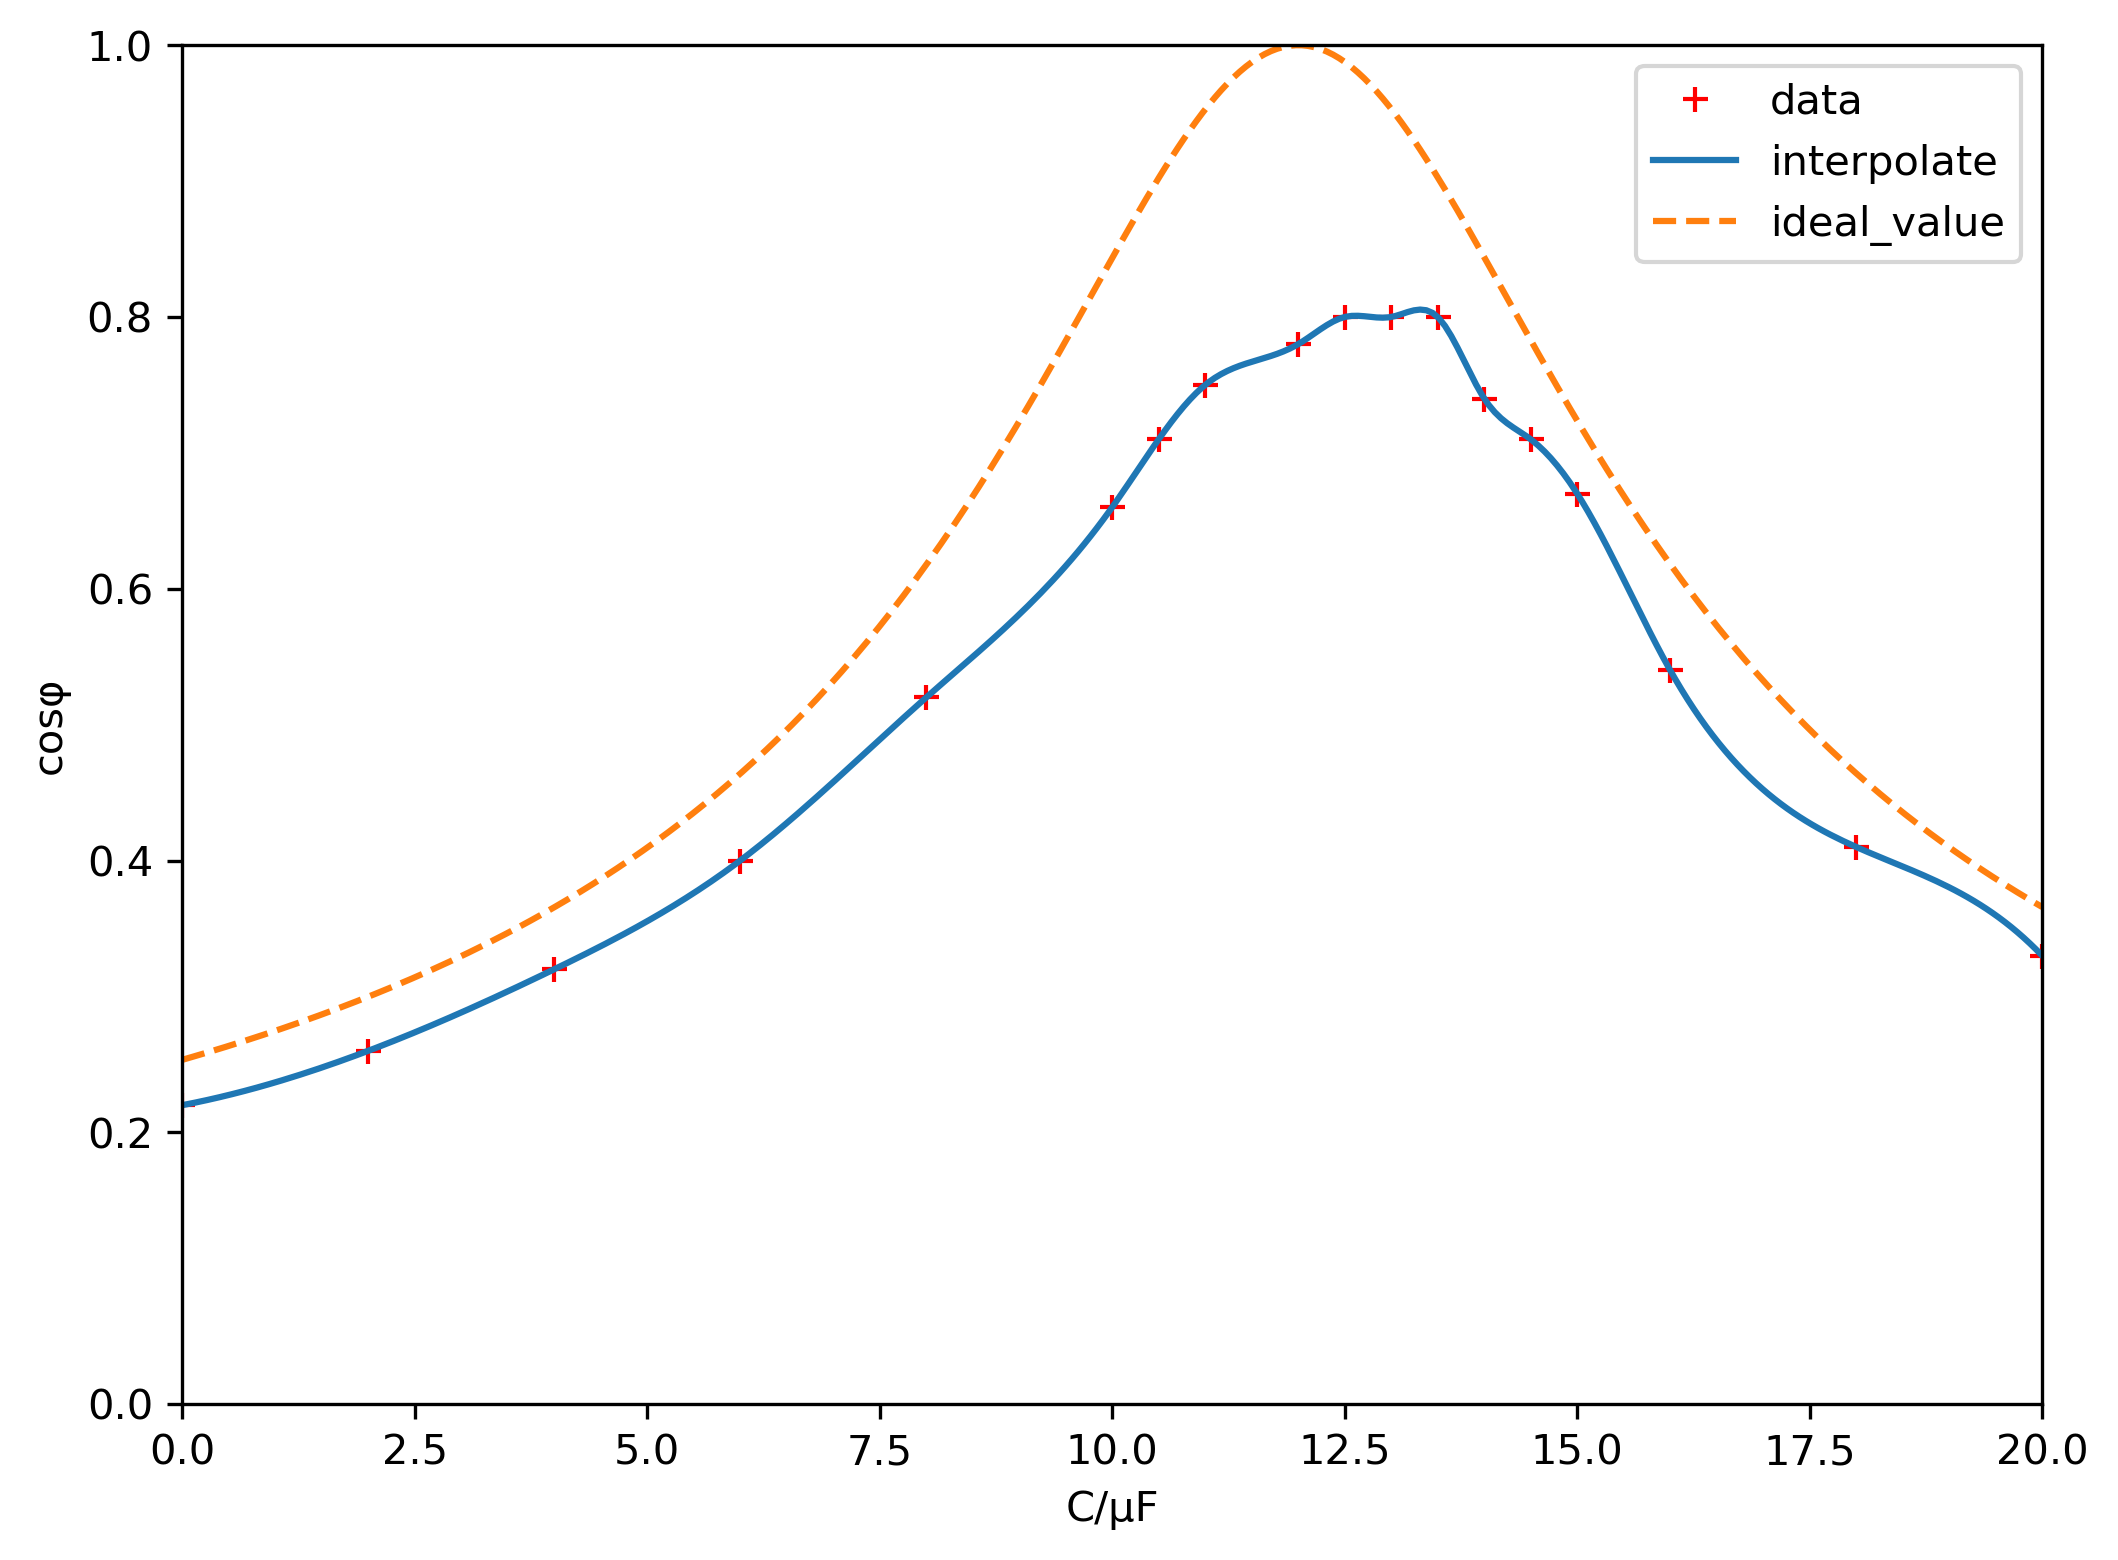

In [6]:
fig,ax = plt.subplots(figsize=(8,6),dpi=300)
ax.plot(C, cosphi,'r+',C_new,cosphi_new,'-',C_new,cosphi_ideal,'--')
ax.legend(['data','interpolate','ideal_value'],loc='best')
ax.axis([0,20,0,1])
ax.set_xlabel("C/μF")
ax.set_ylabel("cosφ")
plt.show()